In [10]:
import torch
import hw1_utils


def k_means(X=None, init_c=None, n_iters=50):
    """K-Means.

    Argument:
        X: 2D data points, shape [2, N].
        init_c: initial centroids, shape [2, 2]. Each column is a centroid.
    
    Return:
        c: shape [2, 2]. Each column is a centroid.
    """

    if X is None:
        X, init_c = hw1_utils.load_data()
    c1, x1 = init_c[:,:1], X[:,:10]
    c2, x2 = init_c[:,1:], X[:,10:]
    
    cluster_lables = []
    uk = [[c1,c2]]
    labels = [torch.tensor([0]*10+[1]*10)]
    costs = []
    for iter in range(n_iters):
        # print(f"Iteration {iter}")
        distances = torch.sum((X.unsqueeze(1)-init_c.unsqueeze(2))**2, dim=0)
        cluster_lables = torch.argmin(distances, dim=0)
        # print("clusters = ", cluster_lables)
        

        cur_uk = []
        cost = 0
        for i in range(2):
            N = list(cluster_lables).count(i)
            u = torch.zeros(1,2)
            for index in range(20):
                if cluster_lables[index]==i:
                    cost += distances[i][index]*0.5
                    u += X[:, index]
            u = u/N
            cur_uk.append(u.reshape(2,1))
        costs.append(cost)
        init_c = torch.cat((cur_uk[0], cur_uk[1]), dim=1)  
        if cur_uk[0].tolist() == uk[-1][0].tolist() and cur_uk[1].tolist() == uk[-1][1].tolist():
            break
        
        labels.append(cluster_lables)
        uk.append(cur_uk)
    print("uk = ", uk)
    print("cost = ", costs)
    print("labels = ", labels)
    return torch.cat((uk[-1][0], uk[-1][1]), dim=1), uk, costs, labels

In [11]:
X, init_c = hw1_utils.load_data()
# c = k_means(X, init_c)
c,uk,costs,labels = k_means()
# print("final centers = ",c)
# print(c.reshape(2,2,1))

uk =  [[tensor([[2.],
        [2.]]), tensor([[-2.],
        [-2.]])], [tensor([[0.2911],
        [0.1694]]), tensor([[-0.5545],
        [-0.0518]])], [tensor([[ 1.9163],
        [-1.9143]]), tensor([[-2.0952],
        [ 2.0540]])]]
cost =  [tensor(143.2423), tensor(73.5160), tensor(4.5600)]
labels =  [tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), tensor([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]


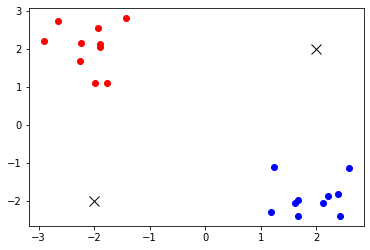

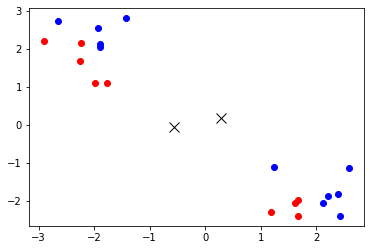

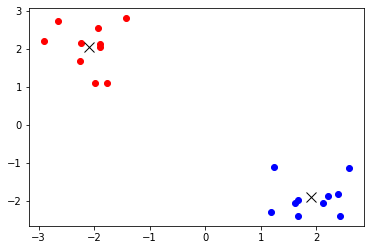

In [17]:
for i in range(3):
    mask = labels[i].to(torch.bool)
    X1 = torch.masked_select(X, mask)
    size1 = int(list(X1.shape)[0]/2)
    X1 = X1.reshape(2,size1)


    X2 = torch.masked_select(X, ~mask)
    size2 = int(list(X2.shape)[0]/2)
    X2 = X2.reshape(2,size2)
    hw1_utils.vis_cluster(uk[i][0], X1, uk[i][1], X2, i+1)

In [103]:
X, init_c = hw1_utils.load_data()
c1 = init_c[:,:1]
labels = [1]*20
labels = torch.tensor(labels)
print(X)
print(labels)
print(X*labels)
print(torch.sum(X*labels, dim=1))


tensor([[ 1.2372,  1.6249,  1.6730,  1.1953,  2.4328,  2.1222,  1.6685,  2.4037,
          2.2196,  2.5856, -1.9005, -1.9771, -1.9235, -2.2378, -1.8924, -2.2621,
         -2.9017, -2.6542, -1.7734, -1.4289],
        [-1.1163, -2.0477, -1.9694, -2.3089, -2.3990, -2.0658, -2.3992, -1.8321,
         -1.8623, -1.1418,  2.1243,  1.1123,  2.5587,  2.1491,  2.0549,  1.6768,
          2.2143,  2.7380,  1.1066,  2.8052]])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([[ 1.2372,  1.6249,  1.6730,  1.1953,  2.4328,  2.1222,  1.6685,  2.4037,
          2.2196,  2.5856, -1.9005, -1.9771, -1.9235, -2.2378, -1.8924, -2.2621,
         -2.9017, -2.6542, -1.7734, -1.4289],
        [-1.1163, -2.0477, -1.9694, -2.3089, -2.3990, -2.0658, -2.3992, -1.8321,
         -1.8623, -1.1418,  2.1243,  1.1123,  2.5587,  2.1491,  2.0549,  1.6768,
          2.2143,  2.7380,  1.1066,  2.8052]])
tensor([-0.1789,  0.1398])


In [20]:
t = torch.randn(3,2)
print(t.shape)
print(t.unsqueeze(dim=2).shape)

torch.Size([3, 2])
torch.Size([3, 2, 1])


In [91]:
X, init_c = hw1_utils.load_data()


c1, x1 = init_c[:,:1], X[:,:10]
c2, x2 = init_c[:,1:], X[:,10:]

c = torch.cat((c1, c2), dim=1)

print(X)
print(c)
print(X.unsqueeze(1).shape)
print(c.unsqueeze(2).shape)
# print(c)
# (X.unsqueeze(2)-c.unsqueeze(1)).shape
print((X.unsqueeze(1)-c.unsqueeze(2)).shape)
# torch.sum((X.unsqueeze(1)-c.unsqueeze(2))**2, dim=1)
distances = torch.sum((X.unsqueeze(1)-c.unsqueeze(2))**2, dim=0)
labels = torch.argmin(distances, dim=0)
print(distances)
print(labels)



tensor([[ 1.2372,  1.6249,  1.6730,  1.1953,  2.4328,  2.1222,  1.6685,  2.4037,
          2.2196,  2.5856, -1.9005, -1.9771, -1.9235, -2.2378, -1.8924, -2.2621,
         -2.9017, -2.6542, -1.7734, -1.4289],
        [-1.1163, -2.0477, -1.9694, -2.3089, -2.3990, -2.0658, -2.3992, -1.8321,
         -1.8623, -1.1418,  2.1243,  1.1123,  2.5587,  2.1491,  2.0549,  1.6768,
          2.2143,  2.7380,  1.1066,  2.8052]])
tensor([[ 2., -2.],
        [ 2., -2.]])
torch.Size([2, 1, 20])
torch.Size([2, 2, 1])
torch.Size([2, 2, 20])
tensor([[10.2931, 16.5244, 15.8632, 19.2140, 19.5389, 16.5458, 19.4630, 14.8482,
         14.9658, 10.2141, 15.2291, 16.6057, 15.7061, 17.9815, 15.1539, 18.2699,
         24.0724, 22.2059, 15.0366, 12.4058],
        [11.2604, 13.1421, 13.4919, 10.3051, 19.8094, 16.9969, 13.6176, 19.4203,
         17.8237, 21.7642, 17.0198,  9.6869, 20.7874, 17.2713, 16.4541, 13.5878,
         18.5731, 22.8769,  9.7021, 23.4157]])
tensor([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1

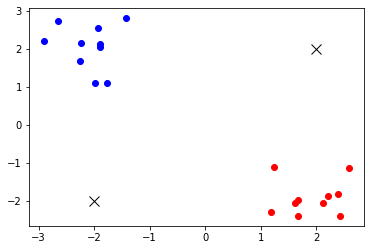

In [12]:
hw1_utils.vis_cluster(init_c[:,:1], X[:,:10], init_c[:,1:], X[:,10:],0)